In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv(
    'C:/Users/Olga/Downloads/Skill Factory_files/stud_math.csv')

display(students.head(10))
students.info()

#cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))


# функция первичного анализа столбца через показатели и гистограмму
def column_analisys(clmn):
    print(clmn.describe())
    clmn.hist()
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)
    perc25 = clmn.quantile(0.25)
    perc75 = clmn.quantile(0.75)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    clmn.loc[clmn.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
             ].hist(bins=10, range=(clmn.min(), clmn.max()), label='IQR')

    plt.legend()
    return


def IQR_left(clmn):  # функция подсчета диапазона без выбросов
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)
    perc25 = clmn.quantile(0.25)

    range_low = perc25 - 1.5*IQR

    return range_low


def IQR_right(clmn):  # функция подсчета диапазона без выбросов
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)

    perc75 = clmn.quantile(0.75)

    range_up = perc75 + 1.5*IQR
    return range_up


def nom_unique(clmn):
    print('Уникальных значений:', clmn.nunique()-1)
    plt.plot(clmn)
    display(clmn.value_counts())
    return

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [58]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [59]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


# age  -анализ и удаление выбросов

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

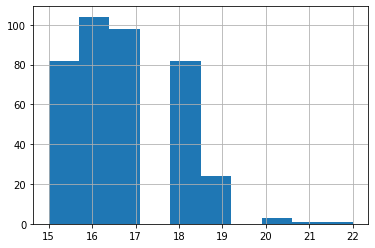

In [60]:
students.age.hist()
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


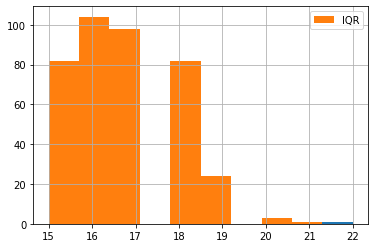

In [61]:
column_analisys(students.age)

In [62]:
students.age.loc[students.age > 21]

247    22
Name: age, dtype: int64

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


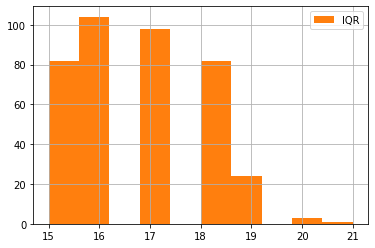

In [63]:
students = students.loc[students.age.between(
    IQR_left(students.age), IQR_right(students.age))]
column_analisys(students.age)

# Medu -анализ и удаление выбросов

In [64]:
students.Medu.describe()

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


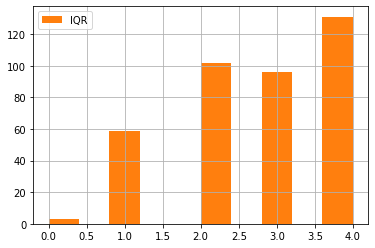

In [65]:
column_analisys(students.Medu)

# Fedu- анализ и удаление выбросов

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


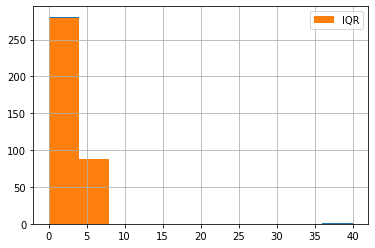

In [66]:
column_analisys(students.Fedu)

In [67]:
students.Fedu.loc[students.Fedu > 10]

11    40.0
Name: Fedu, dtype: float64

count    367.000000
mean       2.531335
std        1.073004
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


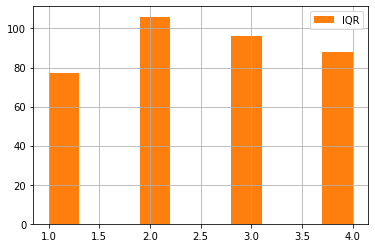

In [68]:
students = students.loc[students.Fedu.between(
    IQR_left(students.Fedu), IQR_right(students.Fedu))]
column_analisys(students.Fedu)

# traveltime - анализ и удаление выбросов

count    342.000000
mean       1.447368
std        0.703057
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


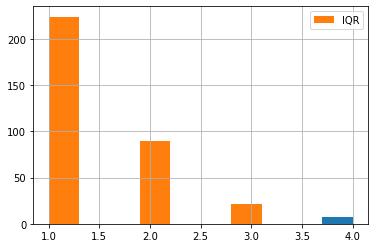

In [69]:
column_analisys(students.traveltime)

In [70]:
students.traveltime.loc[students.traveltime > 3.5]

61     4.0
108    4.0
149    4.0
164    4.0
228    4.0
327    4.0
375    4.0
Name: traveltime, dtype: float64

count    335.000000
mean       1.394030
std        0.604346
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


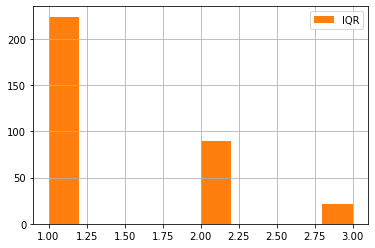

In [71]:
students = students.loc[students.traveltime.between(
    IQR_left(students.traveltime), IQR_right(students.traveltime))]
column_analisys(students.traveltime)

# studytime - анализ и удаление выбросов

count    329.000000
mean       2.027356
std        0.835117
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


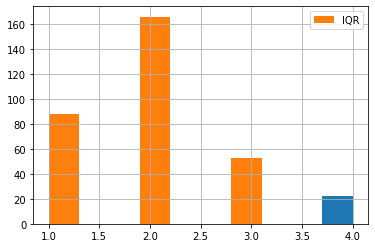

In [72]:
column_analisys(students.studytime)

In [73]:
print(students.studytime.loc[students.studytime > 3.5])
len(students.studytime.loc[students.studytime > 3.5])

47     4.0
66     4.0
69     4.0
71     4.0
77     4.0
94     4.0
95     4.0
105    4.0
106    4.0
121    4.0
140    4.0
204    4.0
210    4.0
256    4.0
271    4.0
282    4.0
293    4.0
298    4.0
303    4.0
330    4.0
334    4.0
338    4.0
Name: studytime, dtype: float64


22

count    307.000000
mean       1.885993
std        0.669137
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


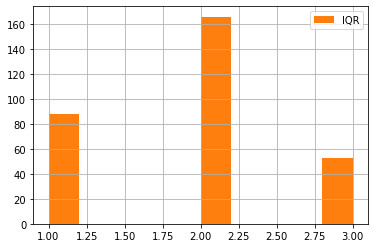

In [74]:
students = students.loc[students.studytime.between(
    IQR_left(students.studytime), IQR_right(students.studytime))]
column_analisys(students.studytime)

# failures - анализ

count    294.000000
mean       0.333333
std        0.728113
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


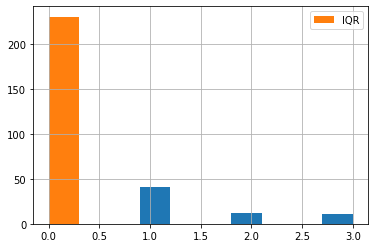

In [75]:
column_analisys(students.failures)

In [76]:
students.failures.loc[students.failures > 0]

2      3.0
18     3.0
25     2.0
40     1.0
44     1.0
      ... 
376    2.0
383    1.0
387    1.0
390    2.0
392    3.0
Name: failures, Length: 64, dtype: float64

### гистограмма failures похожа на traveltime, кроме того целых 80 значений для удаления - пока не стоит

# studytime, granular - анализ и удаление выбросов

count    307.000000
mean      -5.657980
std        2.007411
min       -9.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


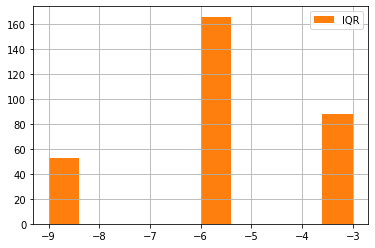

In [77]:
column_analisys(students['studytime, granular'])

### выбросов нет

# famrel- анализ и удаление выбросов

count    286.000000
mean       3.930070
std        0.911142
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


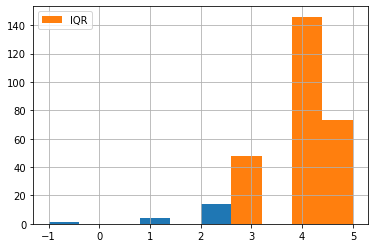

In [78]:
column_analisys(students.famrel)

count    267.000000
mean       4.093633
std        0.667898
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


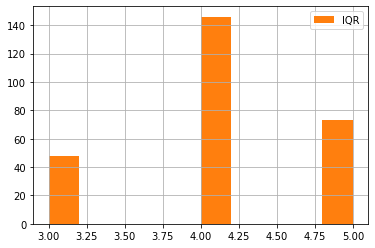

In [79]:
students = students.loc[students.famrel.between(
    IQR_left(students.famrel), IQR_right(students.famrel))]
column_analisys(students.famrel)

# freetime - анализ и удаление выбросов

count    260.000000
mean       3.253846
std        0.965118
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


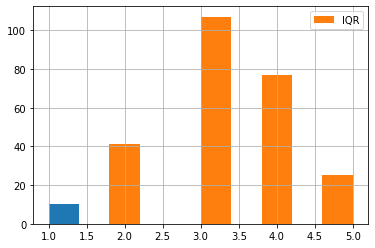

In [80]:
column_analisys(students.freetime)

count    250.00000
mean       3.34400
std        0.86988
min        2.00000
25%        3.00000
50%        3.00000
75%        4.00000
max        5.00000
Name: freetime, dtype: float64
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


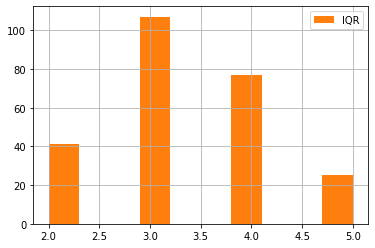

In [81]:
students = students.loc[students.freetime.between(
    IQR_left(students.freetime), IQR_right(students.freetime))]
column_analisys(students.freetime)

# goout- анализ и удаление выбросов

count    244.000000
mean       3.127049
std        1.063927
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


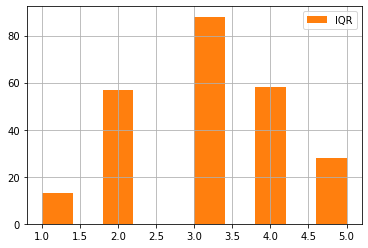

In [82]:
column_analisys(students.goout)

### выбросов нет

# health- анализ и удаление выбросов

count    243.000000
mean       3.502058
std        1.382818
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


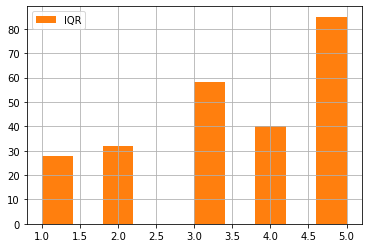

In [83]:
column_analisys(students.health)

### выбросов нет

# absenses - анализ и удаление выбросов

count    241.000000
mean       6.170124
std       15.047428
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


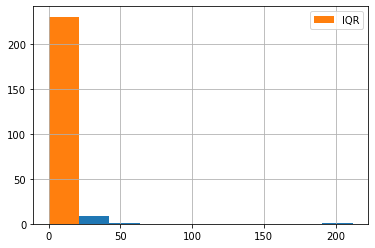

In [84]:
column_analisys(students.absences)

count    230.000000
mean       4.300000
std        4.718402
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


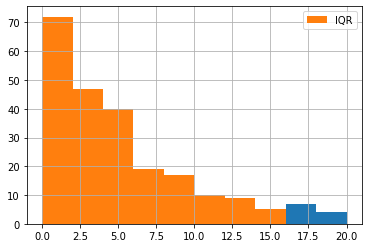

In [85]:
students = students.loc[students.absences.between(
    IQR_left(students.absences), IQR_right(students.absences))]
column_analisys(students.absences)

# score - анализ и удаление выбросов

count    227.000000
mean      51.431718
std       22.322029
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64
25-й перцентиль: 45.0, 75-й перцентиль: 65.0, IQR: 20.0,  Границы выбросов: [15.0, 95.0].


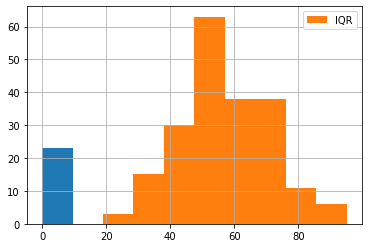

In [86]:
column_analisys(students.score)

### выбросов нет

2


,school
GP,200
MS,30


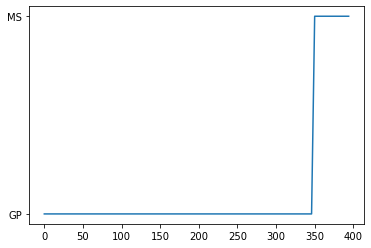

In [87]:
print(students.school.nunique())
plt.plot(students.school)
pd.DataFrame(students.school.value_counts())

Уникальных значений: 1


GP    200
MS     30
Name: school, dtype: int64

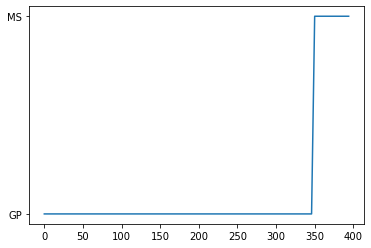

In [88]:
nom_unique(students.school)

Уникальных значений: 1


F    117
M    113
Name: sex, dtype: int64

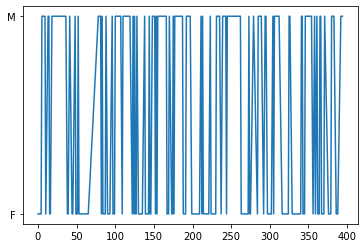

In [89]:
nom_unique(students.sex)

Уникальных значений: 2


U      174
R       47
nan      9
Name: address, dtype: int64

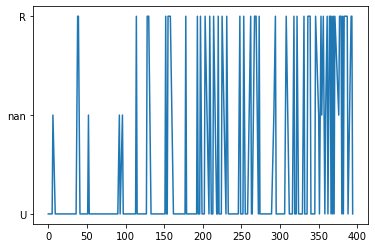

In [90]:
students.address = students.address.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.address)

Уникальных значений: 2


GT3    151
LE3     64
nan     15
Name: famsize, dtype: int64

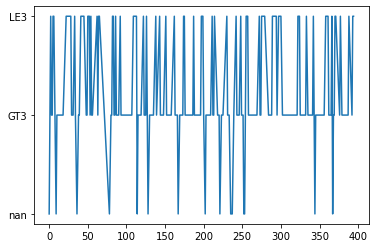

In [91]:
students.famsize = students.famsize.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.famsize)

Уникальных значений: 2


T      191
nan     21
A       18
Name: Pstatus, dtype: int64

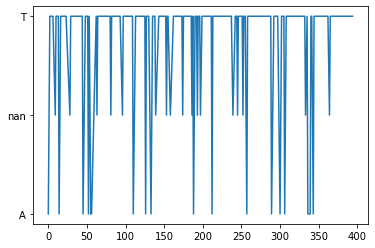

In [92]:
students.Pstatus = students.Pstatus.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.Pstatus)

In [93]:
# [ 'address', 'famsize', 'Pstatus',
#      'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
# students['m'] = students['m'].astype(str).apply(lambda x: None if x.strip() == '' else x)r

Уникальных значений: 5


other       77
services    57
at_home     34
teacher     33
health      19
nan         10
Name: Mjob, dtype: int64

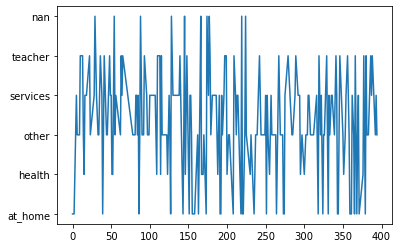

In [94]:
students.Mjob = students.Mjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.Mjob)

Уникальных значений: 5


other       116
services     63
nan          17
teacher      16
at_home      12
health        6
Name: Fjob, dtype: int64

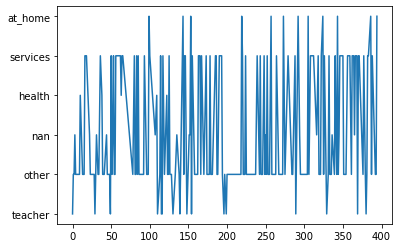

In [95]:
students.Fjob = students.Fjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.Fjob)

Уникальных значений: 4


course        81
home          63
reputation    54
other         22
nan           10
Name: reason, dtype: int64

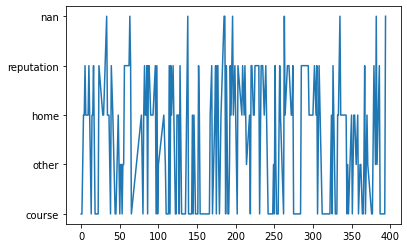

In [96]:
students.reason = students.reason.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.reason)

Уникальных значений: 3


mother    141
father     49
nan        23
other      17
Name: guardian, dtype: int64

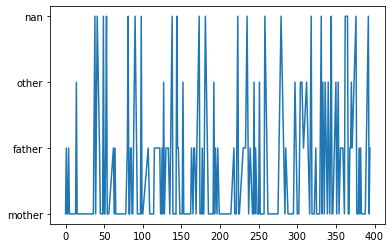

In [97]:
students.guardian = students.guardian.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
nom_unique(students.guardian)

Уникальных значений: 2


no     198
yes     26
nan      6
Name: schoolsup, dtype: int64

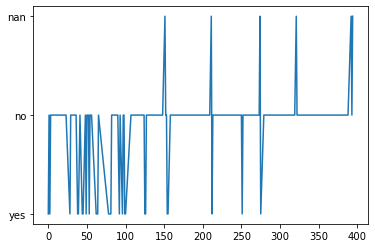

In [98]:
students.schoolsup = students.schoolsup.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
nom_unique(students.schoolsup)

Уникальных значений: 2


yes    123
no      86
nan     21
Name: famsup, dtype: int64

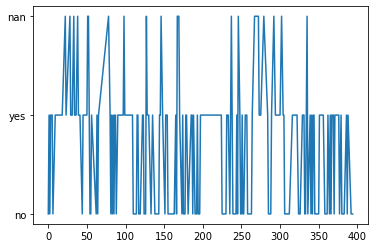

In [99]:
students.famsup = students.famsup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.famsup)

Уникальных значений: 2


no     119
yes     87
nan     24
Name: paid, dtype: int64

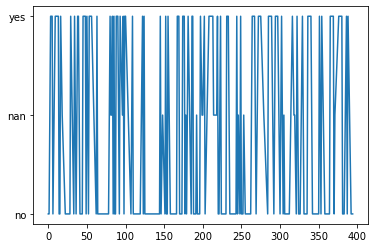

In [100]:
students.paid = students.paid.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.paid)

Уникальных значений: 2


yes    116
no     105
nan      9
Name: activities, dtype: int64

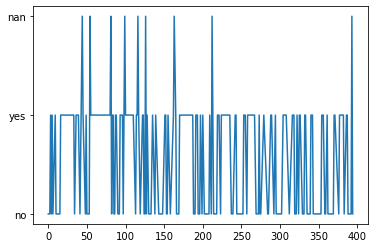

In [101]:
students.activities = students.activities.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
nom_unique(students.activities)

Уникальных значений: 2


yes    166
no      49
nan     15
Name: nursery, dtype: int64

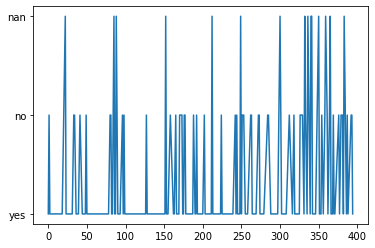

In [102]:
students.nursery = students.nursery.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.nursery)

Уникальных значений: 2


yes    206
nan     12
no      12
Name: higher, dtype: int64

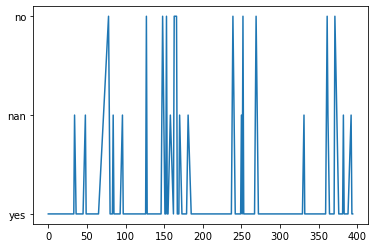

In [103]:
students.higher = students.higher.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
nom_unique(students.higher)

Уникальных значений: 2


yes    176
no      30
nan     24
Name: internet, dtype: int64

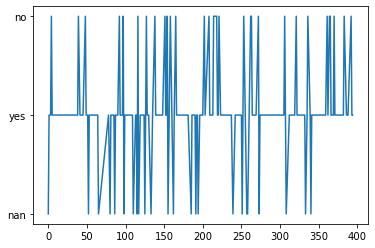

In [104]:
students.internet = students.internet.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
nom_unique(students.internet)

Уникальных значений: 2


no     144
yes     70
nan     16
Name: romantic, dtype: int64

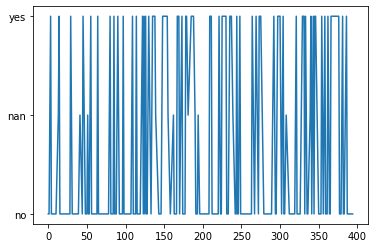

In [105]:
students.romantic = students.romantic.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
nom_unique(students.romantic)

# КОРЕЛЯЦИОННЫЙ АНАЛИЗ



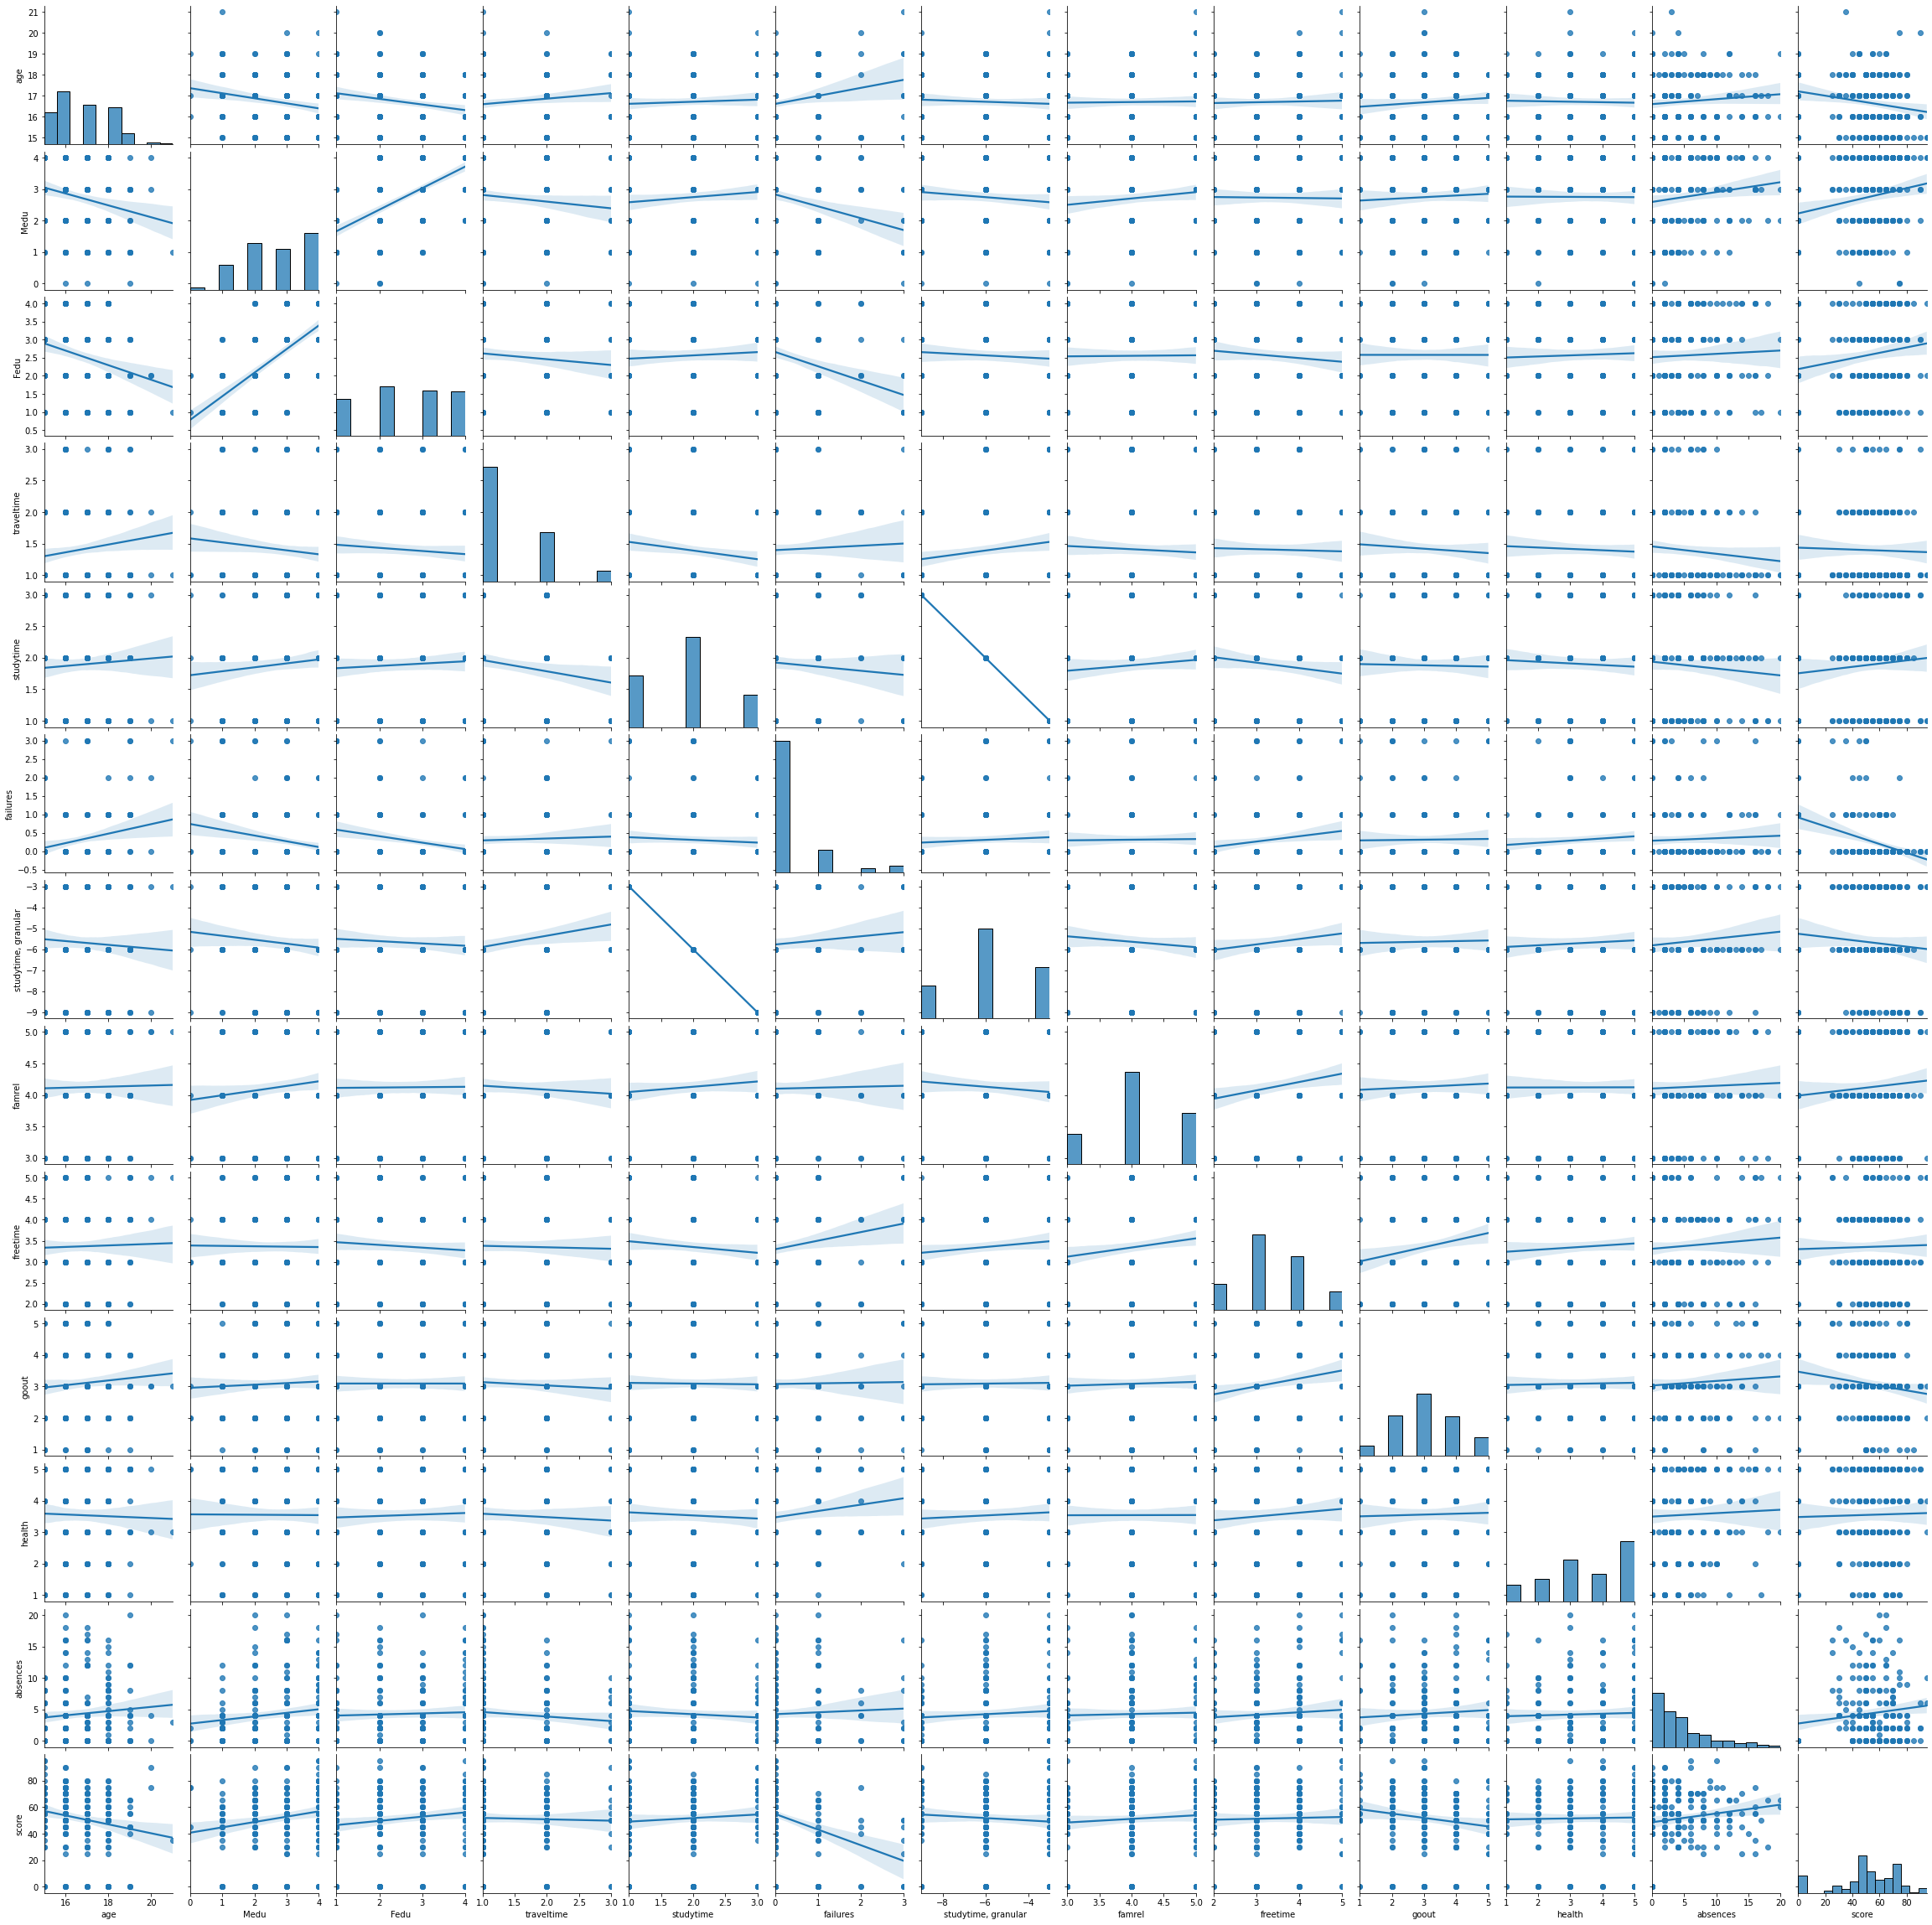

In [106]:
sns.pairplot(students, kind='reg')

In [107]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.213007,-0.232251,0.127945,0.054473,0.221618,-0.054473,0.016324,0.026142,0.088543,-0.025982,0.088962,-0.186370
Medu,-0.213007,1.000000,0.666919,-0.115708,0.100737,-0.242660,-0.100737,0.122055,-0.012011,0.051486,-0.005323,0.133594,0.200574
Fedu,-0.232251,0.666919,1.000000,-0.089167,0.057460,-0.263216,-0.057460,0.009178,-0.080991,-0.000366,0.037238,0.040058,0.154206
traveltime,0.127945,-0.115708,-0.089167,1.000000,-0.156705,0.042439,0.156705,-0.056982,-0.024807,-0.060626,-0.048551,-0.091863,-0.027883
studytime,0.054473,0.100737,0.057460,-0.156705,1.000000,-0.069039,-1.000000,0.084978,-0.109172,-0.015152,-0.050603,-0.074697,0.082737
failures,0.221618,-0.242660,-0.263216,0.042439,-0.069039,1.000000,0.069039,0.016594,0.171401,0.014432,0.108723,0.044588,-0.375485
"studytime, granular",-0.054473,-0.100737,-0.057460,0.156705,-1.000000,0.069039,1.000000,-0.084978,0.109172,0.015152,0.050603,0.074697,-0.082737
famrel,0.016324,0.122055,0.009178,-0.056982,0.084978,0.016594,-0.084978,1.000000,0.170131,0.038671,0.001706,0.030949,0.082295
freetime,0.026142,-0.012011,-0.080991,-0.024807,-0.109172,0.171401,0.109172,0.170131,1.000000,0.206674,0.077390,0.072546,0.026561
goout,0.088543,0.051486,-0.000366,-0.060626,-0.015152,0.014432,0.015152,0.038671,0.206674,1.000000,0.021944,0.064510,-0.154796


## Отбираем для дальнейшей работы коррелирующие с score - Age, Medu, studytime, failures, styditime granular, goout

# Анализ номинативных переменных

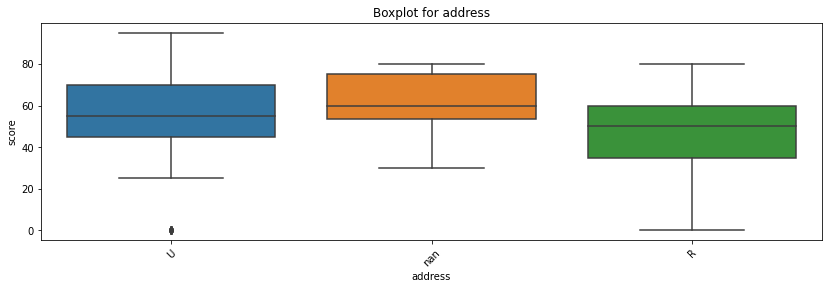

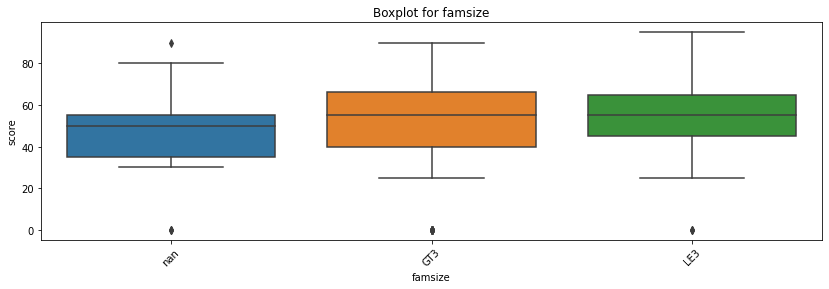

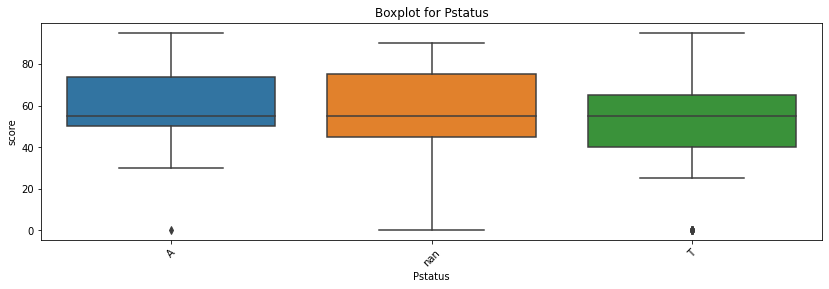

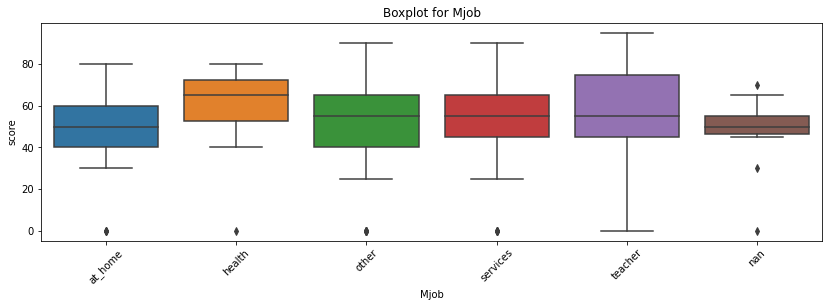

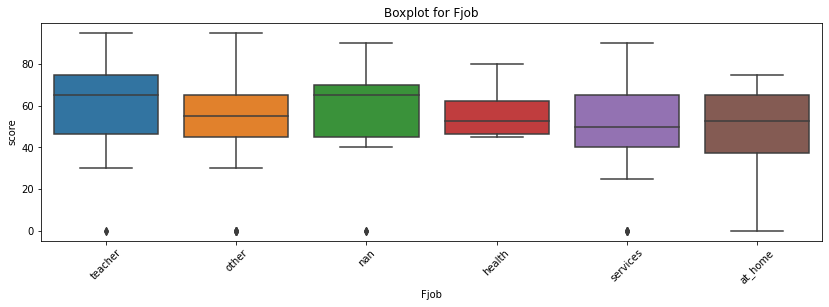

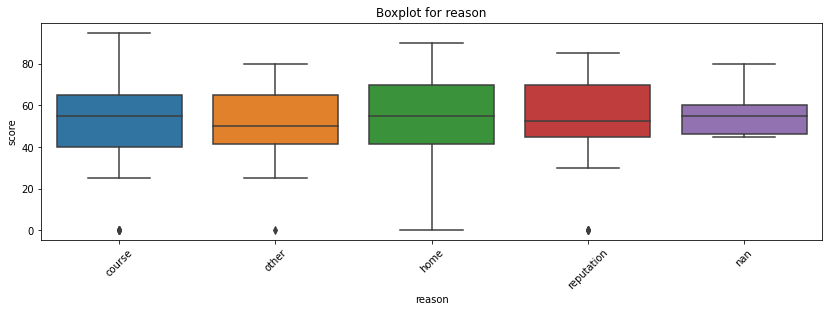

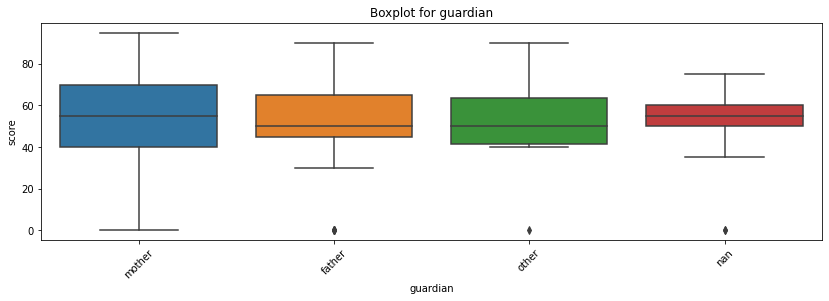

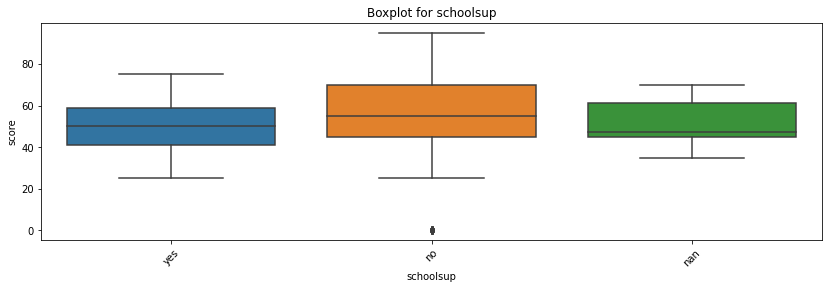

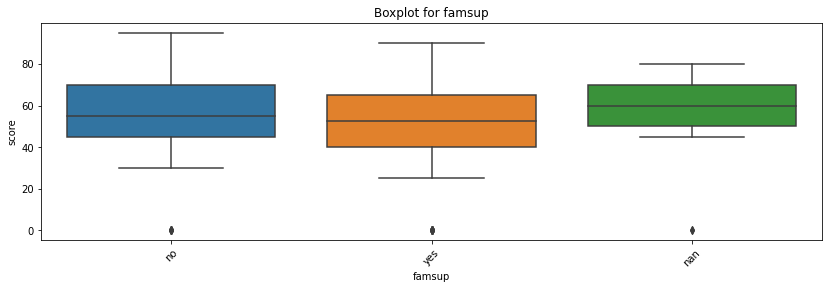

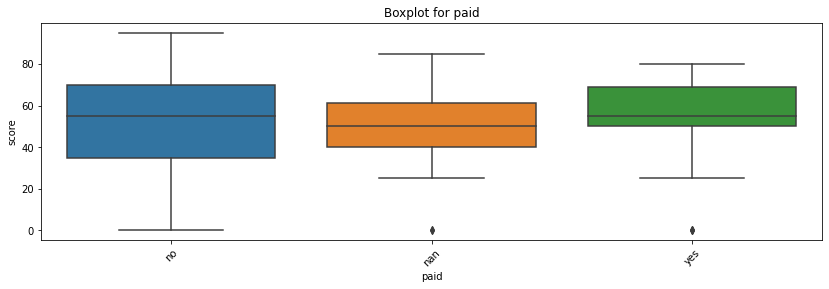

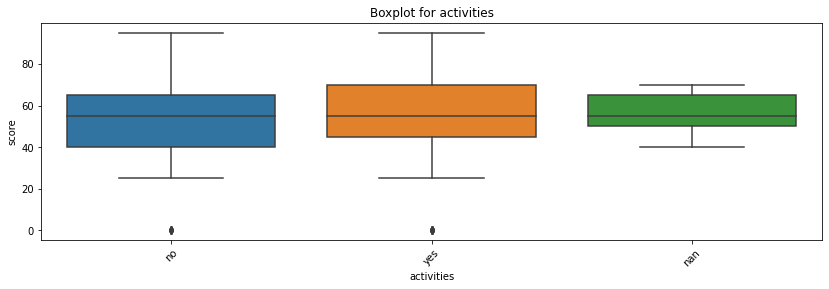

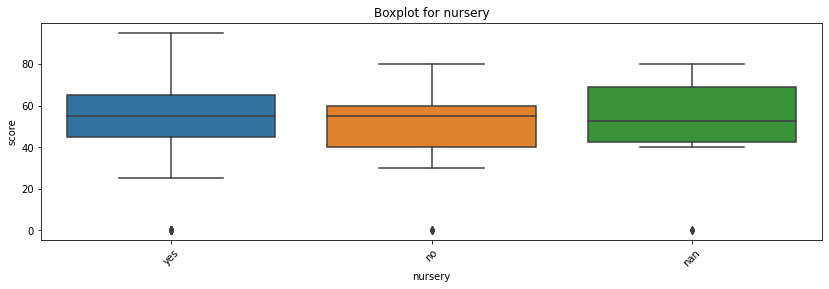

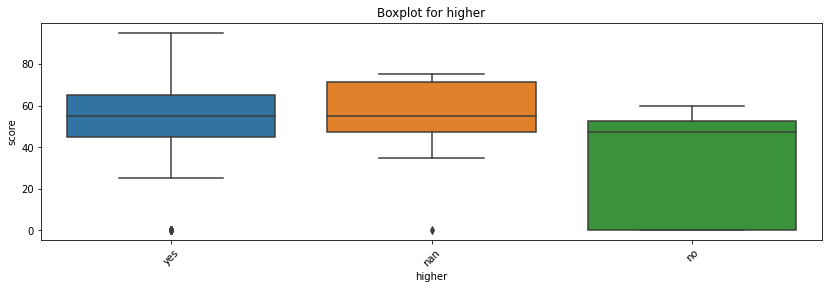

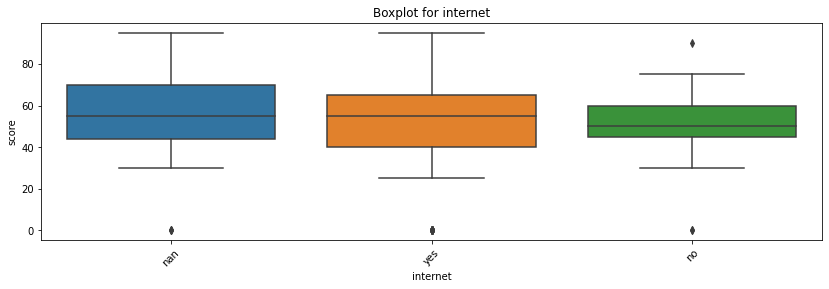

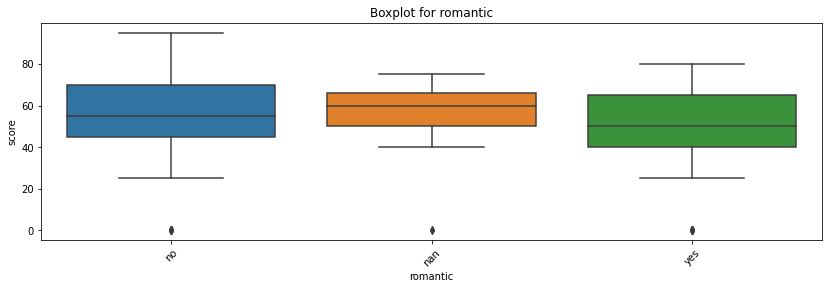

In [108]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

# Все влияют на score: address, Mjob,Fjob, famsize, Pstatus, reason, guardian, famsup, paid, nursery, activity, schoolsup, higher, internet,romantic,

In [109]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

In [110]:
students_for_model = students.loc[:, [
    'Mjob', 'age', 'Medu', 'studytime', 'failures', 'studytime, granular', 'goout']]
students_for_model.head()

,Mjob,age,Medu,studytime,failures,"studytime, granular",goout
0,at_home,18,4.0,2.0,0.0,-6.0,4.0
1,at_home,17,1.0,2.0,0.0,-6.0,3.0
2,at_home,15,1.0,2.0,3.0,-6.0,2.0
3,health,15,4.0,3.0,0.0,-9.0,2.0
4,other,16,3.0,2.0,0.0,-6.0,2.0
